 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col= "Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns_csv = Path("Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_returns_df["Close"] = sp500_returns_df["Close"].str.replace("$", "").astype("float")
sp500_returns_df.dtypes
sp500_returns_df.head()

C:\Users\chemi\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={
    "Close":"S&P500"
})
sp500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

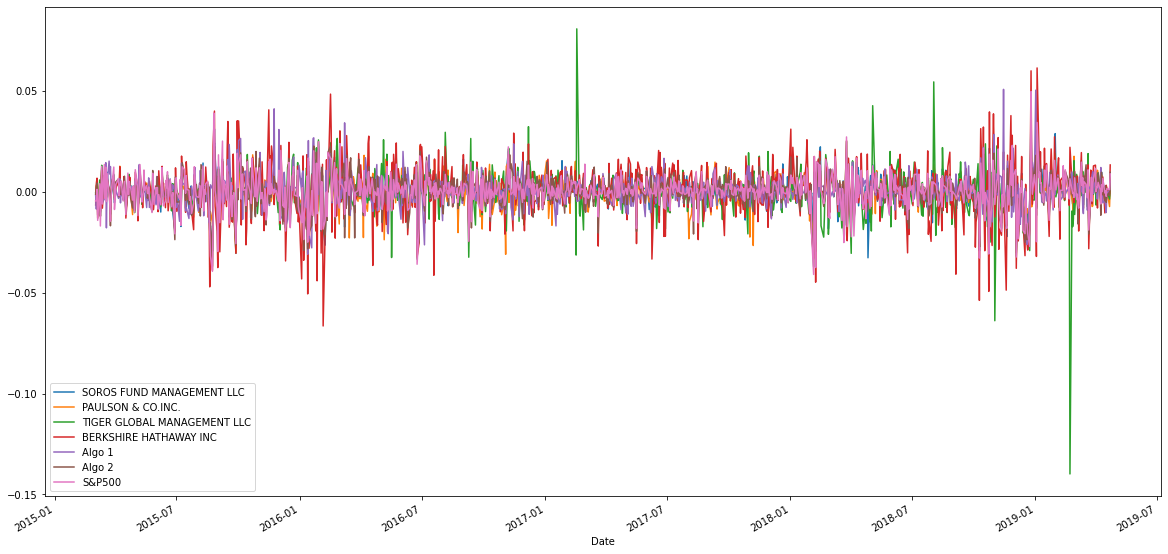

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

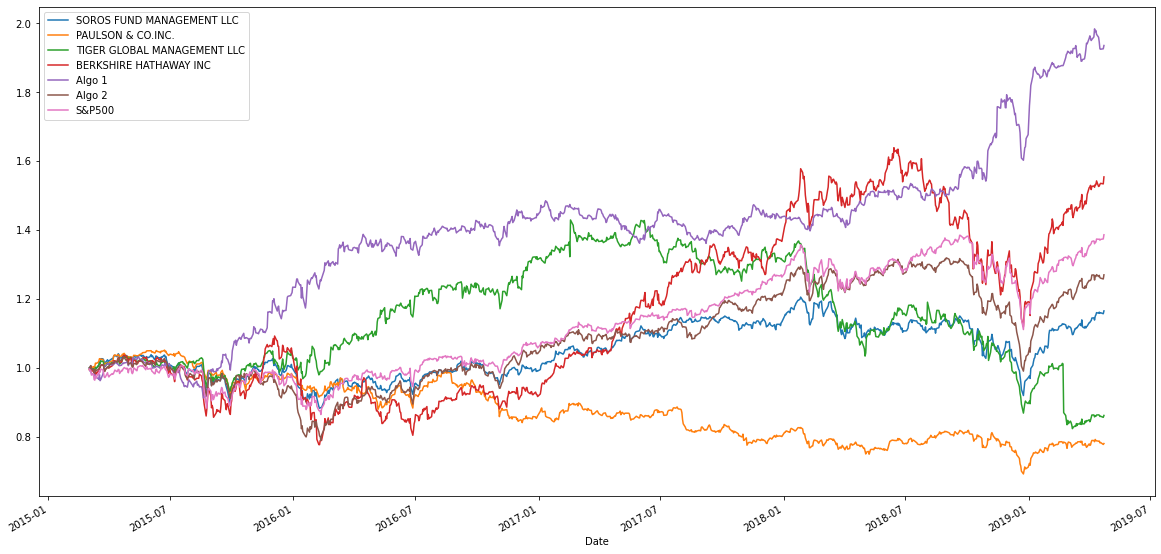

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() 

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

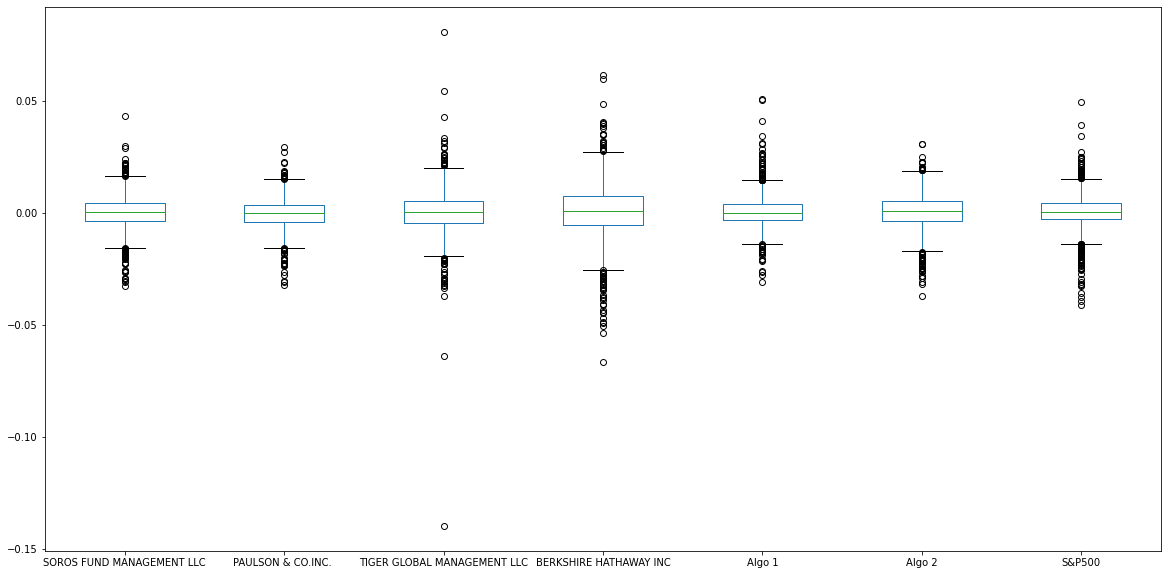

In [17]:
# Box plot to visually show risk
combined_df.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std_all_portfolios = combined_df.std().sort_values()
daily_std_all_portfolios

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
riskier_than_SP500 = [daily_std_all_portfolios > daily_std_all_portfolios['S&P500']]
riskier_than_SP500

[PAULSON & CO.INC.              False
 Algo 1                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 2                         False
 S&P500                         False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_all_portfolios * np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

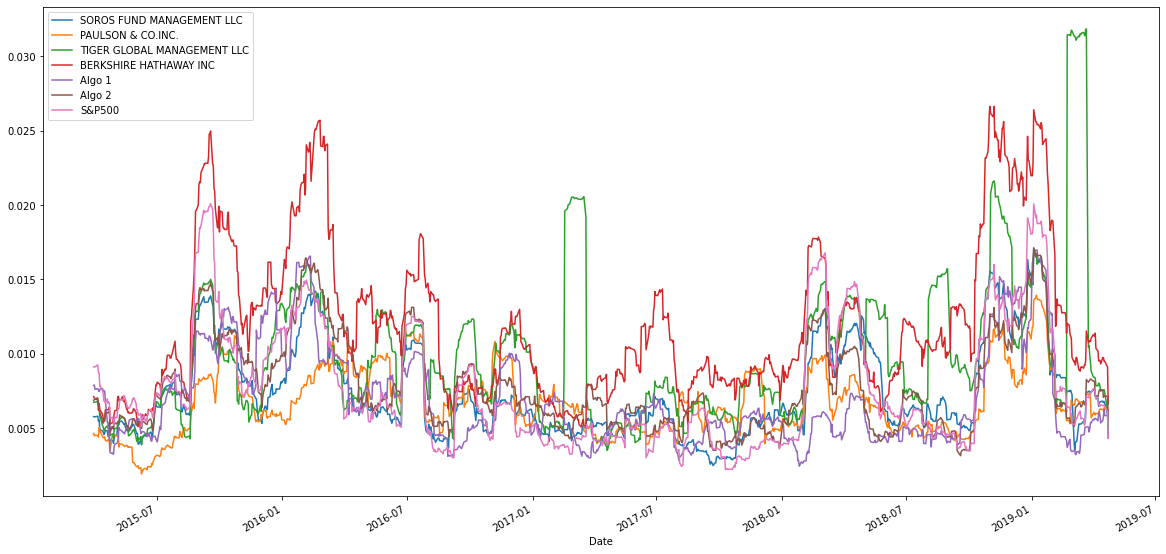

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

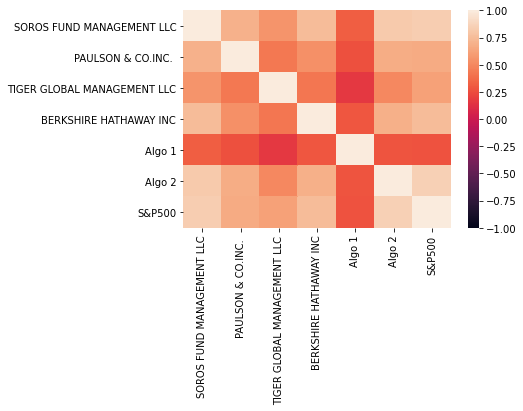

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

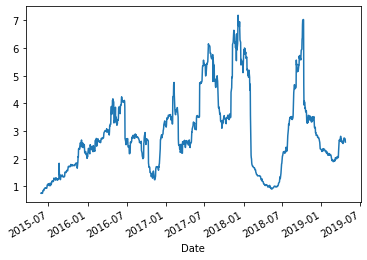

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov()
# Calculate variance of S&P 500
variance = combined_df['S&P500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

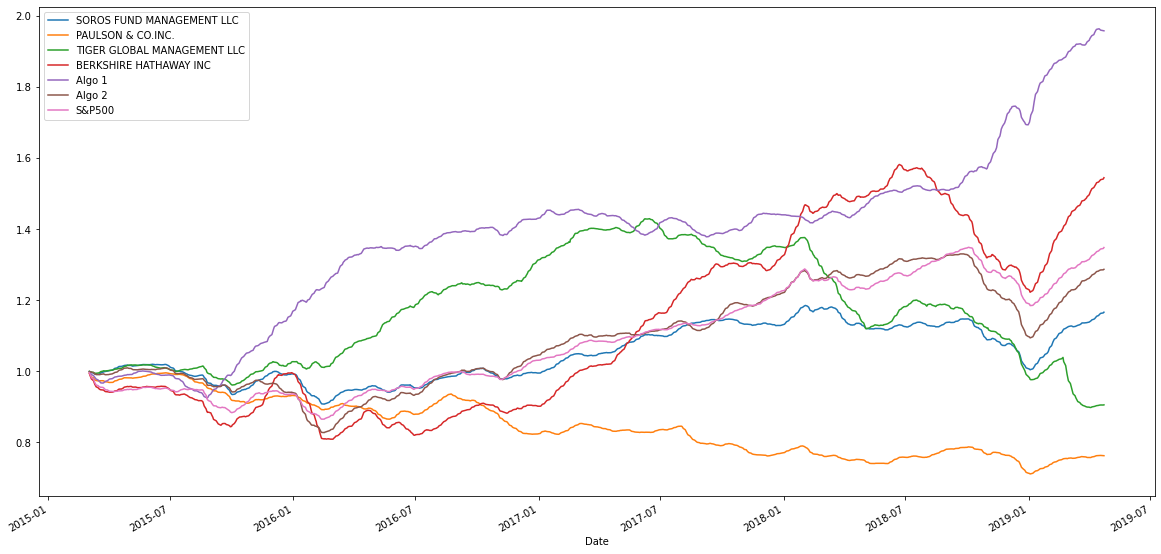

In [24]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(span = 21, adjust = False).mean()
(1+ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

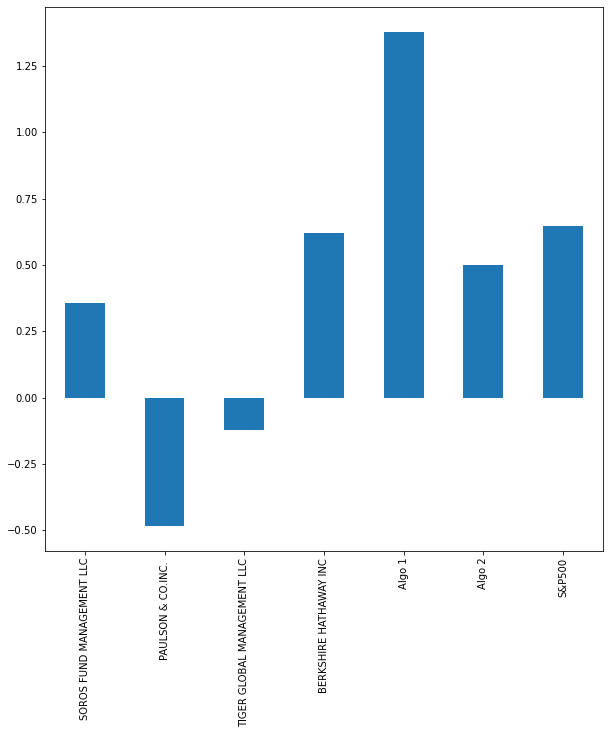

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", figsize=(10,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Answer: Algo1 outperfoms all others, while Algo2 underperforms compared to the S&P500 and Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
goog_historical_csv = Path("Resources/goog_historical.csv")
goog_historical_df = pd.read_csv(goog_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_historical_df.rename(columns={
    "NOCP": "GOOG"
}, inplace=True)
goog_historical_df.drop(columns=["Symbol"], inplace=True)
goog_historical_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [28]:
# Reading data from 2nd stock
aapl_historical_csv = Path("Resources/aapl_historical.csv")
aapl_historical_df = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_historical_df.rename(columns={
    "NOCP": "AAPL"
}, inplace=True)
aapl_historical_df.drop(columns=["Symbol"], inplace=True)
aapl_historical_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [29]:
# Reading data from 3rd stock
cost_historical_csv = Path("Resources/cost_historical.csv")
cost_historical_df = pd.read_csv(cost_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_historical_df.rename(columns={
    "NOCP": "COST"
}, inplace=True)
cost_historical_df.drop(columns=["Symbol"], inplace=True)
cost_historical_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [30]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((goog_historical_df, aapl_historical_df, cost_historical_df), axis = "columns", join = "inner")
all_stocks.head(20)

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
2019-05-02,1162.61,209.15,242.69
2019-05-01,1168.08,210.52,241.59
2019-04-30,1188.48,200.67,245.53
2019-04-29,1287.58,204.61,244.28


In [31]:
# Reset Date index
#Already did above:
#all_stocks.set_index("Trade DATE", inplace=True)

In [32]:
# Reorganize portfolio data by having a column per symbol
#Already did above:
#all_stocks.drop(columns="Symbol", inplace=True)
#all_stocks.columns = ["GOOG", "AAPL", "COST"]

In [33]:
# Calculate daily returns
all_stocks_daily_returns = all_stocks.pct_change()
# Drop NAs
all_stocks_daily_returns.dropna(inplace=True)
# Display sample data
all_stocks_daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_stocks_daily_returns = all_stocks_daily_returns.dot(weights)
# Display sample data
all_stocks_daily_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([all_stocks_daily_returns, combined_df], axis="columns", join="inner")
joined_df.rename(columns={
    0: "STOCKS"
}, inplace=True)
joined_df.head()

,STOCKS,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna()

,STOCKS,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-23,-0.000415,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
joined_df_std = joined_df * np.sqrt(252)
joined_df_std.head()

,STOCKS,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-23,-0.006595,0.113778,0.055316,0.102736,0.210776,0.078888,0.152738,0.140350
2019-04-22,-0.187516,-0.041047,-0.116402,-0.057787,-0.017268,0.010740,-0.030728,0.016066
2019-04-18,-0.018217,0.022985,0.019396,0.009232,0.030417,-0.009333,-0.019513,0.025067
2019-04-17,-0.024458,-0.045984,-0.102663,-0.069998,0.051150,-0.163524,-0.082994,-0.036095
2019-04-16,-0.145233,0.042852,0.006162,-0.013191,0.013282,-0.110244,0.046027,0.008086


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

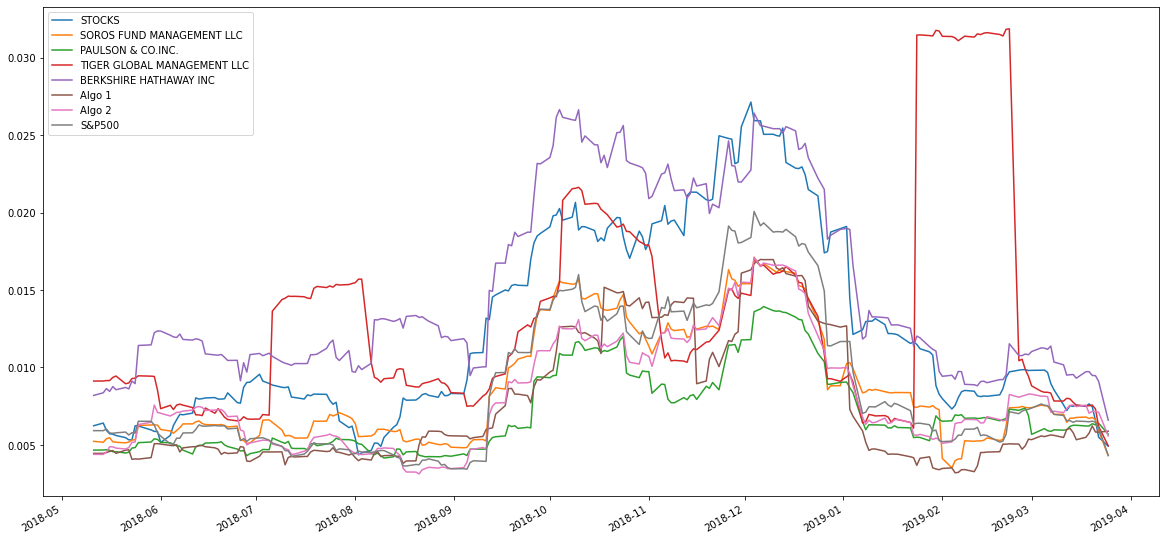

In [40]:
# Calculate rolling standard deviation
rolling_std = joined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

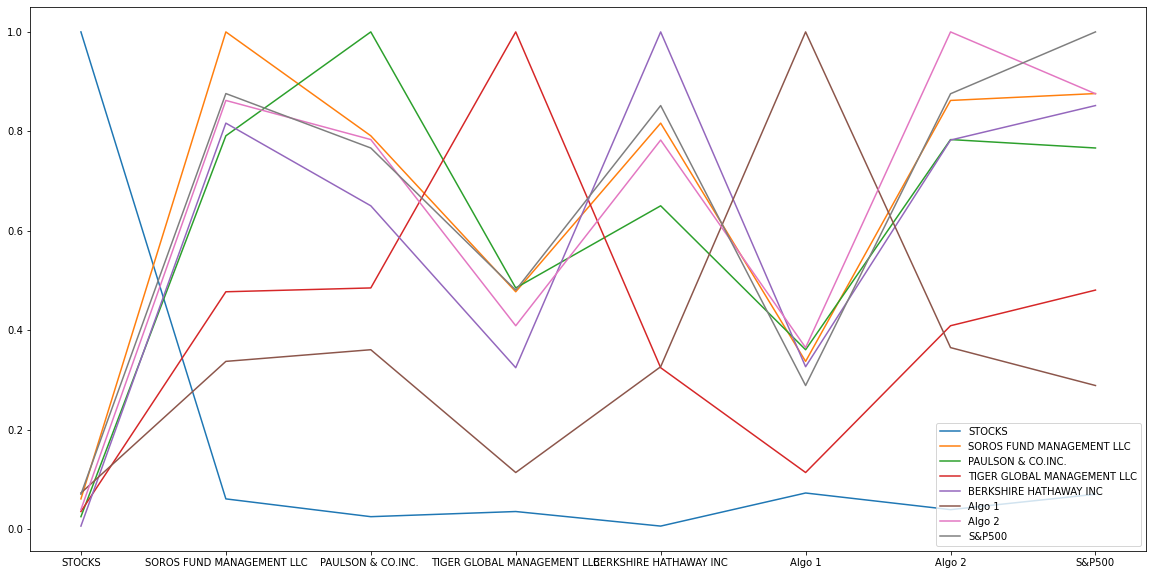

In [42]:
# Calculate and plot the correlation
correlation = joined_df.corr()
correlation.plot(figsize=(20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

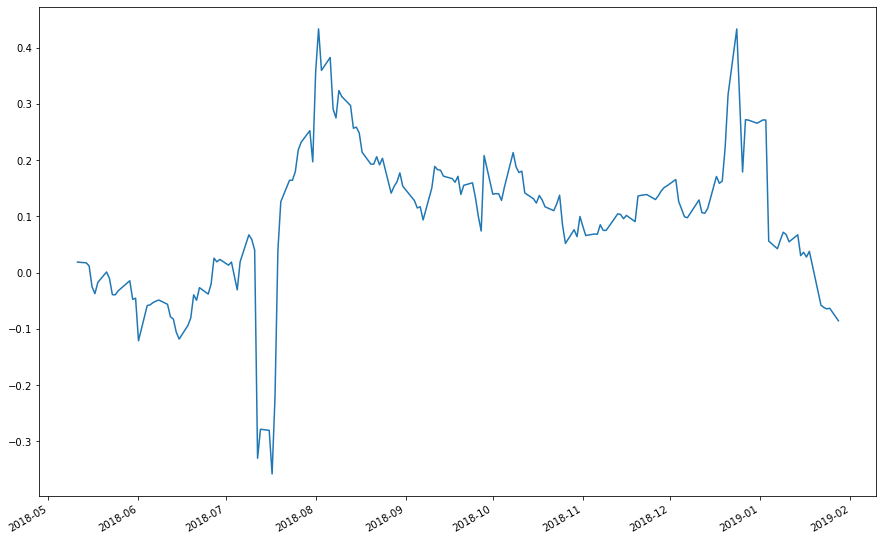

In [46]:
# Calculate and plot Beta
covarience = joined_df["STOCKS"].rolling(window=60).cov(joined_df["S&P500"])
varience = joined_df["S&P500"].rolling(window=60).var()
beta = covarience / varience
beta.plot(figsize=(15,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratios = joined_df.mean()*252/(joined_df.std()*np.sqrt(252))
annualized_sharpe_ratios

STOCKS                        -0.614330
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
S&P500                         0.595486
dtype: float64

<AxesSubplot:>

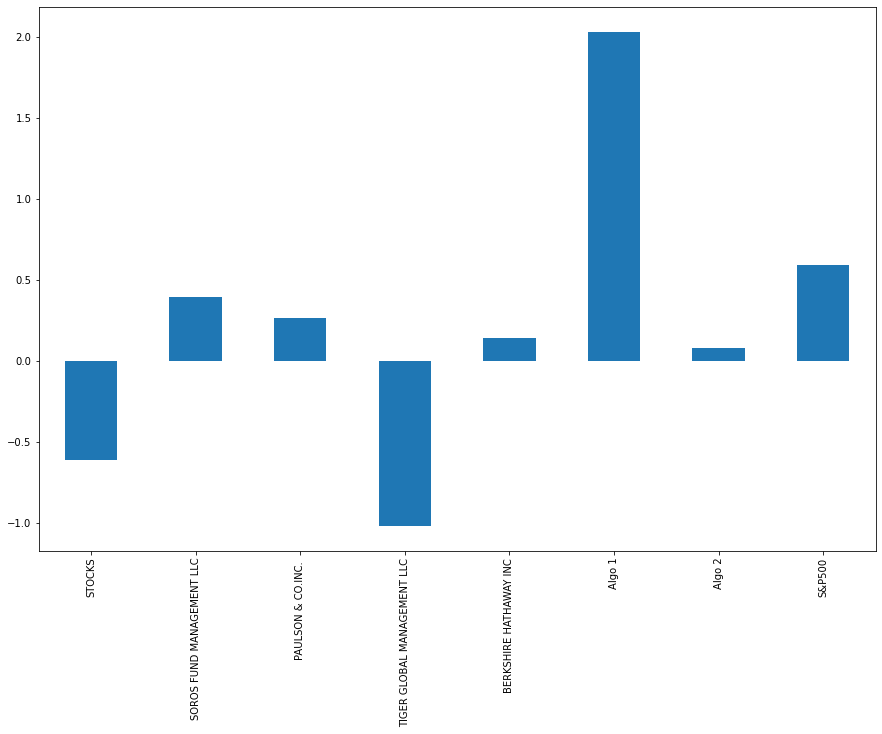

In [49]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", figsize=(15,10))

### How does your portfolio do?

Answer: My STOCKS seem to only be doing better than Tiger Global. The best porfolio performance came from Algo1, followed by the S&P500.